In [3]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
image_dir = './dataset-FEI/frontalimages_spatiallynormalized/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  # Ajuste o tamanho conforme necessário
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  # Guarda o caminho para referência futura

images = np.array(images)

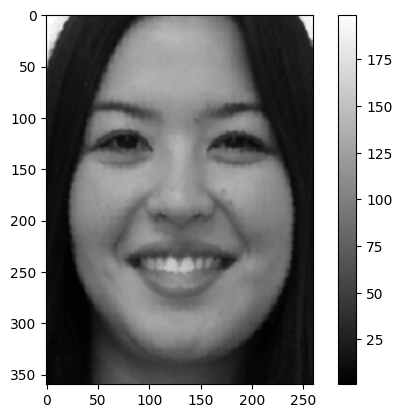

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[99], cmap='gray')
plt.colorbar()
plt.grid(False)

In [7]:
# Achatar as imagens em (n_samples, height * width)
images_vetorizada = images.reshape(images.shape[0], -1)

In [8]:
# Opcional: Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(images_vetorizada)

In [9]:
# Aplicar PCA
n_components = 400
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Verificar a forma do novo conjunto de dados
print(X_pca.shape)  # Deve ser (400, 50)

(400, 400)


In [10]:
X_pca.shape

(400, 400)

In [11]:
# Aplicar PCA para reduzir a 2 componentes principais

X_pca_2d = pca.fit_transform(X_scaled)

# Plotar os dados projetados em 2D
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção dos Dados em 2D')
plt.grid(True)
plt.show()


: 

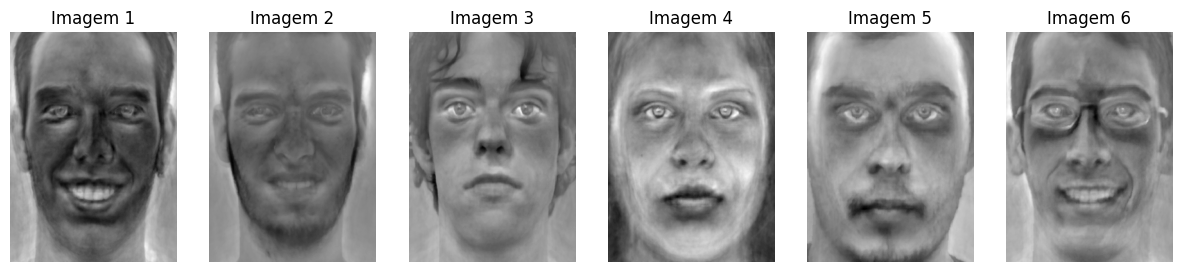

In [10]:
# Reconstruir as imagens a partir da projeção PCA
X_reconstructed = pca.inverse_transform(X_pca_2d)  # Usa pca_2d aqui, ajuste conforme necessário

# Mostrar algumas imagens reconstruídas
num_images_to_show = 6
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))
for i in range(num_images_to_show):
    ax = axes[i]
    image_reconstructed = X_reconstructed[i].reshape(360, 260)
    ax.imshow(image_reconstructed, cmap='gray')
    ax.set_title(f'Imagem {i+1}')
    ax.axis('off')
plt.show()
